In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_json("data/2021-05-03T17:56:02_inv_server.json")

In [26]:
data

,end,inv,result,start
0,1620057302125,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '0', 'amount': 450, 'end_compu...",1620057294579
1,1620057302114,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '0', 'amount': 450, 'end_compu...",1620057295577
2,1620057302724,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '1', 'amount': 450, 'end_compu...",1620057296578
3,1620057304134,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '1', 'amount': 450, 'end_compu...",1620057297578
4,1620057304634,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '0', 'amount': 450, 'end_compu...",1620057298578
5,1620057304879,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '0', 'amount': 450, 'end_compu...",1620057299578
6,1620057304825,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '1', 'amount': 450, 'end_compu...",1620057300579
7,1620057306168,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '1', 'amount': 450, 'end_compu...",1620057301579
8,1620057307662,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '0', 'amount': 450, 'end_compu...",1620057302580
9,1620057307676,"{'configuration': 'test|tinyyolov2-7.onnx', 'p...","{'accelerator': '1', 'amount': 450, 'end_compu...",1620057303579


In [27]:
data.result[0]

{'accelerator': '0',
 'amount': 450,
 'end_computation': 1620057301764,
 'metadata': {'inference_ms': 1969.8271751403809},
 'pid': '27337',
 'request': '',
 'result': ['output.bin'],
 'result_type': 'reference',
 'start_computation': 1620057298208}

In [59]:
min_vals = data.min()
min_vals.start
type(data.start[0])

numpy.int64

In [23]:
# Draw plot 1: x = time; y = pid; line = does invocation

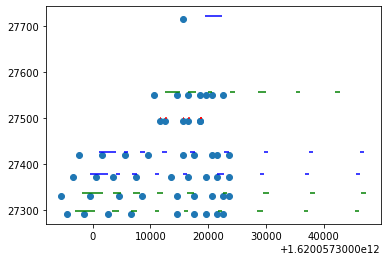

In [78]:
invokes = []
starts = []
ends = []
pids = []
colors = []
for index, row in data.iterrows():
    if row.end == -1:
        starts.append(row.start)
        ends.append(row.start+300)
        pids.append(27500)
        colors.append('red')
        invokes.append(row.start)
        continue
    invokes.append(row.start)
    starts.append(int(row.result['start_computation']))
    ends.append(int(row.result['end_computation']))
    pids.append(int(row.result['pid']))
    if int(row.result['accelerator']) == 0:
        colors.append('green')
    else:
        colors.append('blue')
    if index > 50:
        break
    
plt.scatter(invokes, [pid-7 for pid in pids])
plt.hlines(y=pids, xmin=starts, xmax=ends, colors=colors, linestyle="solid")
plt.show()

<AxesSubplot:ylabel='Frequency'>

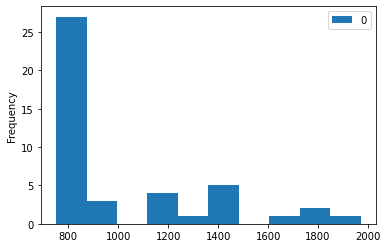

In [83]:
infs = []
for index, row in data.iterrows():
    if row.end == -1:
        continue
    infs.append(row.result['metadata']['inference_ms'])
infs = pd.DataFrame(infs)
infs.plot.hist()